In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from finquant.portfolio import build_portfolio

## All the stocks are taken from screener.in. These are hand picked stocks taken using query.               
#### Below are the queries that helped me pick valuable stocks            
Market Capitalization > 7000 And                        
Sales Growth 10Years > 10% and                          
Average return on capital employed 10Years > 15% and                          
Promoter holding > 33% and                         
Return over 10 Years > 17%

In [2]:
df = pd.read_excel('screener_comb.xlsx',index_col='Date',parse_dates=True).fillna(method='ffill')
df.head()

,ARTIIND,ABBOTTINDIA,AEGISCHEM,AJANTPHARM,ASIANPAINTS,ASTRAL,ATUL,AUROPHARMA,BALKRISIND,BATAINDIA,BBTC,BERGEPAINT,BRITANNIA,DABUR,DIVISLAB,EICHERMOT,GODREJCP,GRAULES,HATSUN,HCLTECH,HEXAWARE,HONAUT,IGL,IPCALAB,KRBL,MARICO,MARUTI,MINDTREE,NATCOPHARM,NIITTECH,PAGEIND,PDLITIND,RELAXO,SOLARINDS,SUPREMEIND,TCS,TIMKEN,TITAN,TORNTPHARM,TTKPRESTIG,TVSMOTOR,VINATIORGA,WABCOINDIA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-08-10,210.201355,4706.607422,79.685043,1602.936401,868.882324,334.035950,1373.700317,762.747986,325.763885,569.956909,581.143311,152.833954,1525.859741,291.463745,939.414612,19648.990234,436.573700,110.981316,280.603271,408.414856,245.058792,8971.309570,84.037384,752.009399,180.342911,202.320999,4259.235352,572.662415,474.307495,442.680176,14095.514648,570.429016,279.382385,685.360596,605.083252,1121.619385,589.454285,318.864990,1397.546021,3164.101318,226.001053,240.412613,6573.969727
2015-08-11,207.386124,4445.460938,82.049278,1589.366089,872.266296,326.907715,1372.919189,746.043030,324.396942,566.598206,590.531799,157.417236,1578.915039,287.927734,983.473511,19454.666016,434.614227,103.142845,280.298828,407.153992,246.946182,8979.762695,86.601456,752.306335,179.300446,201.399048,4266.006348,597.249207,470.887054,448.646790,14176.094727,575.576233,278.098022,702.012146,607.320129,1130.426880,579.666260,317.945221,1399.044800,3128.819336,215.664627,236.448074,6558.983887
2015-08-12,198.354034,4392.703125,79.850105,1652.098633,854.137390,326.429810,1330.155762,729.092896,319.188354,551.916321,578.709229,158.726624,1604.089355,282.788666,1020.919495,19151.703125,421.551086,99.510376,274.008331,408.871399,245.014908,8944.852539,83.697754,761.314209,176.220520,201.306839,4266.006348,608.142456,460.225616,479.543274,14222.073242,566.291992,269.527069,678.022644,603.498779,1144.534668,566.852051,319.591034,1399.044800,3128.819336,215.809525,233.718018,6313.210449
2015-08-13,198.659027,4438.070801,78.631577,1610.711548,842.486511,329.177582,1289.589111,721.401733,312.211975,552.492188,559.187073,154.557281,1582.154785,281.374237,1039.275269,19203.322266,402.532013,102.569321,274.853455,422.088837,242.030090,8694.852539,81.447823,763.393005,173.803940,195.175919,4255.163086,617.006836,434.443665,491.753784,14222.073242,552.533997,263.796661,652.363281,595.436584,1174.200684,546.283081,317.703186,1420.401367,2997.820068,217.886475,217.954788,6331.073730
2015-08-14,201.943405,4704.454102,80.675400,1626.648315,845.387146,332.124481,1282.608398,746.728821,314.851685,558.033813,571.655457,153.626114,1619.316162,275.339386,1040.495850,19876.697266,401.552307,107.301056,278.506744,419.806244,243.666046,8745.580078,82.084595,808.283875,167.833572,193.401184,4330.599121,607.591187,441.789459,460.117279,13545.435547,549.118652,270.490387,642.428101,598.232788,1158.334961,545.195557,324.383484,1466.673950,3021.959717,222.378448,218.928162,6471.848633


In [4]:
stocks5_ret = df.pct_change().dropna(how = 'any')
stocks5_ret.head()

,ARTIIND,ABBOTTINDIA,AEGISCHEM,AJANTPHARM,ASIANPAINTS,ASTRAL,ATUL,AUROPHARMA,BALKRISIND,BATAINDIA,BBTC,BERGEPAINT,BRITANNIA,DABUR,DIVISLAB,EICHERMOT,GODREJCP,GRAULES,HATSUN,HCLTECH,HEXAWARE,HONAUT,IGL,IPCALAB,KRBL,MARICO,MARUTI,MINDTREE,NATCOPHARM,NIITTECH,PAGEIND,PDLITIND,RELAXO,SOLARINDS,SUPREMEIND,TCS,TIMKEN,TITAN,TORNTPHARM,TTKPRESTIG,TVSMOTOR,VINATIORGA,WABCOINDIA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-08-11,-0.013393,-0.055485,0.029670,-0.008466,0.003895,-0.021340,-0.000569,-0.021901,-0.004196,-0.005893,0.016155,0.029989,0.034771,-0.012132,0.046900,-0.009890,-0.004488,-0.070629,-0.001085,-0.003087,0.007702,0.000942,0.030511,0.000395,-0.005780,-0.004557,0.001590,0.042934,-0.007211,0.013478,0.005717,0.009023,-0.004597,0.024296,0.003697,0.007852,-0.016605,-0.002885,0.001072,-0.011151,-0.045736,-0.016491,-0.002280
2015-08-12,-0.043552,-0.011868,-0.026803,0.039470,-0.020784,-0.001462,-0.031148,-0.022720,-0.016056,-0.025912,-0.020020,0.008318,0.015944,-0.017848,0.038075,-0.015573,-0.030057,-0.035218,-0.022442,0.004218,-0.007821,-0.003888,-0.033529,0.011974,-0.017177,-0.000458,0.000000,0.018239,-0.022641,0.068866,0.003243,-0.016130,-0.030820,-0.034172,-0.006292,0.012480,-0.022106,0.005176,0.000000,0.000000,0.000672,-0.011546,-0.037471
2015-08-13,0.001538,0.010328,-0.015260,-0.025051,-0.013641,0.008418,-0.030498,-0.010549,-0.021857,0.001043,-0.033734,-0.026267,-0.013674,-0.005002,0.017980,0.002695,-0.045117,0.030740,0.003084,0.032327,-0.012182,-0.027949,-0.026882,0.002731,-0.013713,-0.030456,-0.002542,0.014576,-0.056020,0.025463,0.000000,-0.024295,-0.021261,-0.037844,-0.013359,0.025920,-0.036286,-0.005907,0.015265,-0.041869,0.009624,-0.067446,0.002830
2015-08-14,0.016533,0.060022,0.025992,0.009894,0.003443,0.008952,-0.005413,0.035108,0.008455,0.010030,0.022297,-0.006025,0.023488,-0.021448,0.001174,0.035066,-0.002434,0.046132,0.013292,-0.005408,0.006759,0.005834,0.007818,0.058804,-0.034351,-0.009093,0.017728,-0.015260,0.016909,-0.064334,-0.047577,-0.006181,0.025375,-0.015230,0.004696,-0.013512,-0.001991,0.021027,0.032577,0.008052,0.020616,0.004466,0.022236
2015-08-17,0.006041,0.000093,-0.011313,-0.017694,0.023903,0.007194,0.002474,0.027881,-0.015795,0.011091,-0.001043,0.031630,-0.016211,0.009247,0.000266,0.003117,0.004996,0.026281,-0.002673,0.008441,0.024315,0.000631,0.018204,0.010042,-0.016093,-0.004171,-0.004965,-0.004972,-0.033514,0.019803,0.034348,0.017346,0.009040,0.018108,0.005998,0.025649,0.003122,0.004626,0.021299,0.045225,0.000217,0.014964,0.033997


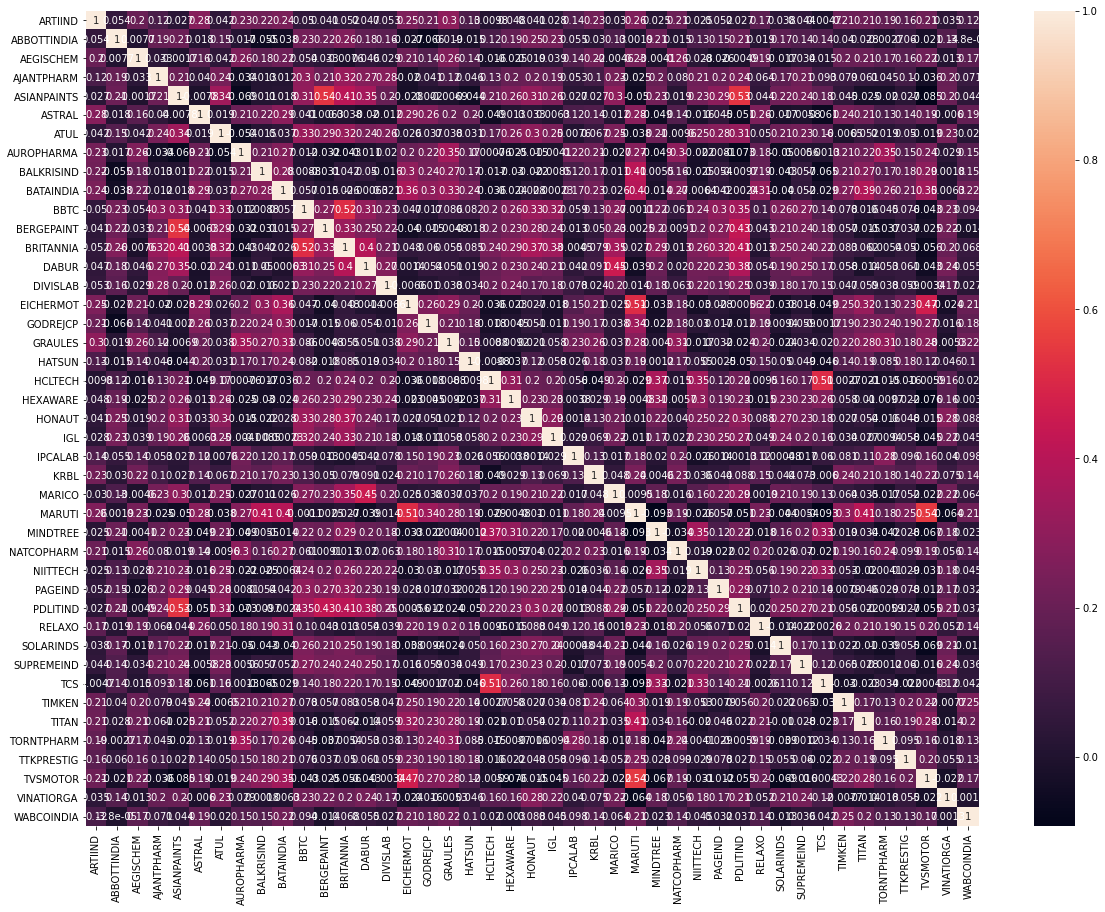

In [5]:
plt.figure(figsize=(20,15))
sns.heatmap(stocks5_ret.corr(),annot=True)

### From above correlation plot we can see that there are some high correlation between the stocks and if these stocks we took into consideration for portfolio building then this can increase volatility (risk).

## Calculating variance and returns for the stocks given

In [6]:
returns = stocks5_ret.mean() * 245
variance = stocks5_ret.std() * np.sqrt(245)
returns.columns = ["Returns"]
variance.columns = ["Variance"]
#Concatenating the returns and variances into a single stocks5_ret-frame
ret_var = pd.concat([returns, variance], axis = 1)
ret_var.columns = ["Returns","Variance"]
ret_var

,Returns,Variance
ARTIIND,0.377469,0.326178
ABBOTTINDIA,0.282535,0.271400
AEGISCHEM,0.290805,0.446930
AJANTPHARM,0.062046,0.326114
ASIANPAINTS,0.168993,0.252030
ASTRAL,0.284187,0.334241
ATUL,0.310389,0.306083
AUROPHARMA,0.118169,0.409299
BALKRISIND,0.347547,0.358866
BATAINDIA,0.202560,0.298495


## Filtering stocks with respect to the annula Returns. Here I have taken criteria as returns greater than 13.

In [9]:
ret_var = ret_var[ret_var['Returns'] > 0.13]

In [10]:
ret_var

,Returns,Variance
ARTIIND,0.377469,0.326178
ABBOTTINDIA,0.282535,0.271400
AEGISCHEM,0.290805,0.446930
ASIANPAINTS,0.168993,0.252030
ASTRAL,0.284187,0.334241
ATUL,0.310389,0.306083
BALKRISIND,0.347547,0.358866
BATAINDIA,0.202560,0.298495
BBTC,0.269507,0.452378
BERGEPAINT,0.297401,0.315783


## For selection of the stocks we will cluster them so as to reduce correlation between the stocks.                     
## The no of clusters would be based on who is operating this file and what no of stocks the person would like to consider for portfolio optimization

# Clustering

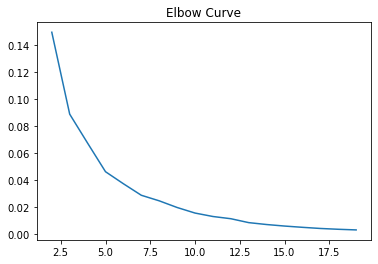

In [11]:
from sklearn.cluster import KMeans
X =  ret_var.values #Converting ret_var into nummpy array
sse = []
for k in range(2,20):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters
plt.plot(range(2,20), sse)
plt.title("Elbow Curve")
plt.show()

In [12]:
# Silhoutte
from sklearn.metrics import silhouette_score

sil=[]
cl=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for k in cl:
    mod=KMeans(k)
    mod.fit(ret_var)
    score=silhouette_score(ret_var,mod.labels_)
    print(score)
    sil.append(score)

0.46866676755295555
0.49816478248022744
0.4572049744784043
0.4368334285168851
0.4383985951599631
0.42382651208300576
0.4402650298252924
0.3886772825028676
0.4034389145131101
0.41136598689806814
0.4472290632025346
0.4621683251497446
0.4599808990258678
0.4670313427293065
0.46409830150065295
0.4522560597432976
0.4341076904717976
0.4233639243462188
0.38434195110566644


# Enter no of Stock you have to include in the portfolio

In [13]:
clus = int(input('Enter no of clusters to be formed '))

Enter no of clusters to be formed 6


In [14]:
clust_mod=KMeans(n_clusters=clus)
clust_mod.fit(ret_var)
label=clust_mod.labels_
ret_var['label']= label
ret_var.sort_values(by = 'label')

C:\Users\Sagar Kumbhar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Returns,Variance,label
BBTC,0.269507,0.452378,0
AEGISCHEM,0.290805,0.446930,0
GRAULES,0.306710,0.443946,0
KRBL,0.230211,0.499376,0
TVSMOTOR,0.180589,0.335815,1
GODREJCP,0.138957,0.309072,1
TORNTPHARM,0.194975,0.305844,1
MARUTI,0.137699,0.309479,1
HEXAWARE,0.167849,0.386043,1
BATAINDIA,0.202560,0.298495,1


In [15]:
b = ret_var.groupby('label')['Returns'].max()
b = list(b)
b

[0.3067095573391113,
 0.2135513196047225,
 0.310388689800141,
 0.22088577078179664,
 0.39649953316323727,
 0.3774686927825959]

In [16]:
c = ret_var.groupby('label')['Variance'].min()
c = list(c)
c

[0.4439458927033834,
 0.2927243421433306,
 0.27139980588948914,
 0.24830881480424483,
 0.43251014905176766,
 0.3079632721163534]

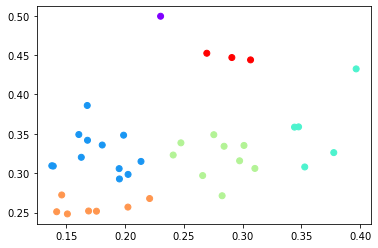

In [17]:
kmeans = KMeans(n_clusters = clus).fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

### Following are the stocks taken from the clusters 1 from each whose returns are highest in that specific cluster

In [18]:
high_ret = pd.DataFrame()
for i in b:
    high_ret = high_ret.append(ret_var[ret_var['Returns'] == i])
high_ret

,Returns,Variance,label
GRAULES,0.306710,0.443946,0
RELAXO,0.213551,0.314985,1
ATUL,0.310389,0.306083,2
BRITANNIA,0.220886,0.267856,3
NIITTECH,0.396500,0.432510,4
ARTIIND,0.377469,0.326178,5


In [19]:
low_var = pd.DataFrame()
for i in c:
    low_var = low_var.append(ret_var[ret_var['Variance'] == i])
low_var

,Returns,Variance,label
GRAULES,0.306710,0.443946,0
SUPREMEIND,0.195205,0.292724,1
ABBOTTINDIA,0.282535,0.271400,2
MARICO,0.150963,0.248309,3
NIITTECH,0.396500,0.432510,4
IGL,0.352785,0.307963,5


In [20]:
high_ret.drop('label',axis=1,inplace=True)
low_var.drop('label',axis=1,inplace=True)

In [21]:
high_ret_col = list(high_ret.index)
low_var_col = list(low_var.index)

high_ret_data = stocks5_ret[high_ret_col]
low_var_data = stocks5_ret[low_var_col]

# Correlation between the high returns data

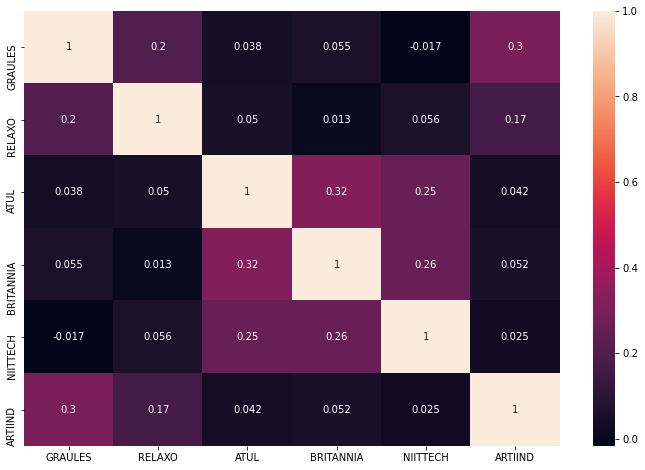

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(high_ret_data.corr(),annot=True)

### Above we can see that we have minimised the correlation between stocks which will reduce volatility (risk) of portfolio

# Correlation between low variance data

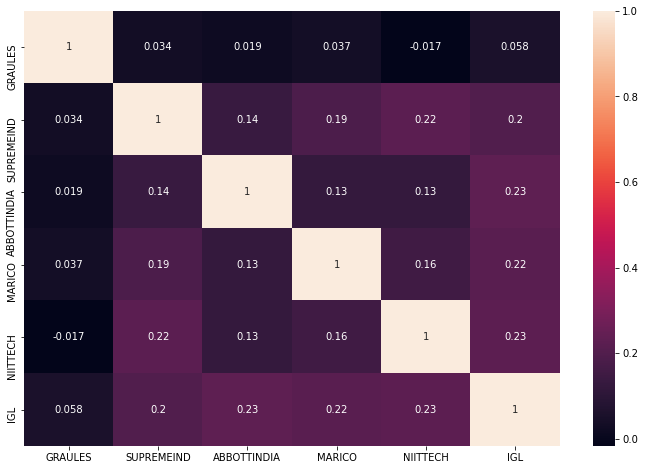

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(low_var_data.corr(),annot=True)

# Portfolio Optimization for high Return Data using Markowitz technique

In [24]:
# no of days considered here in a year
q1_ret = high_ret_data.mean() * 245
q1_cov = high_ret_data.cov() * 245

In [25]:
pf_ret , pf_vol , pf_sharpe_ratio , pf_coin_weight = ([] for i in range(4))
num_portfolios = 50000
for portfolio in range (num_portfolios):
    weights = np.random.random(6)
    weights = weights/np.sum(weights)
    returns = np.dot(weights,q1_ret)
    volatility = np.sqrt(np.dot(weights.T , np.dot(q1_cov , weights)))
    sharpe = returns/volatility
    pf_coin_weight.append(weights)
    pf_ret.append(returns)
    pf_vol.append(volatility)
    pf_sharpe_ratio.append(sharpe)

In [26]:
print('Max sharpe ratio: ', max(pf_sharpe_ratio))
print('Its location in the array: ', pf_sharpe_ratio.index(max(pf_sharpe_ratio)))
sharp_max = pf_sharpe_ratio.index(max(pf_sharpe_ratio))

Max sharpe ratio:  1.759012440763582
Its location in the array:  39715


So the best portfolio is on index (Location) shown above. Let’s check the allocation weights in that index number and save the return and volatility figures to use it in the chart later

In [27]:
pf_coin_weight = pd.DataFrame(pf_coin_weight)

#get all the weights given to the stocks
print(pf_coin_weight.iloc[sharp_max,:])

max_sr_ret = pf_ret[pf_sharpe_ratio.index(max(pf_sharpe_ratio))]
max_sr_vol = pf_vol[pf_sharpe_ratio.index(max(pf_sharpe_ratio))]

0    0.064058
1    0.131704
2    0.203098
3    0.148121
4    0.165101
5    0.287918
Name: 39715, dtype: float64


In [28]:
print('Max returns for this portfolio: ', max_sr_ret)
print('Max volatility for this portfolio: ', max_sr_vol)

Max returns for this portfolio:  0.31767244691995494
Max volatility for this portfolio:  0.1805970438628929


## The above result is for maximum sharpe ratio

# Efficient Frontier 

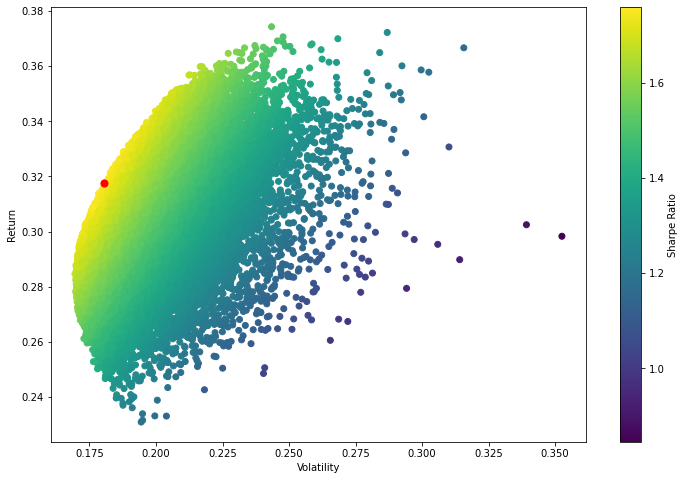

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
plt.scatter(pf_vol, pf_ret, c=pf_sharpe_ratio, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50)

plt.show()

In [30]:
high_ret_random = pd.DataFrame()
high_ret_random['Returns'] = pf_ret
high_ret_random['Volatility'] = pf_vol
high_ret_random['Sharp_ratio'] = pf_sharpe_ratio
high_ret_random.head()

,Returns,Volatility,Sharp_ratio
0,0.302820,0.182503,1.659263
1,0.306510,0.210650,1.455069
2,0.332920,0.203374,1.636987
3,0.282506,0.181151,1.559507
4,0.288627,0.183208,1.575403


## Input minimum returns and maximum volatility desired as per the graph

In [31]:
ret = float(input('Enter minimum returns you want '))
vol = float(input('Enter maximum volatility you want '))
high_ret_random[(high_ret_random['Returns'] > ret) & (high_ret_random['Volatility'] < vol)]

Enter minimum returns you want 0.3
Enter maximum volatility you want 0.18


,Returns,Volatility,Sharp_ratio
55,0.301789,0.174164,1.732788
64,0.308368,0.178420,1.728326
102,0.302187,0.174695,1.729802
116,0.304251,0.178660,1.702963
123,0.304465,0.179282,1.698248
170,0.305985,0.177461,1.724235
174,0.313328,0.179292,1.747589
201,0.309118,0.177915,1.737447
276,0.306123,0.179027,1.709928
434,0.303240,0.179863,1.685948


# Input index of desired parameters

In [32]:
ind = int(input('Enter the index of parameters you want '))
print('The weightage for corresponding parameters are ')
print(high_ret_col)
print(pf_coin_weight.iloc[ind,:])

Enter the index of parameters you want 174
The weightage for corresponding parameters are 
['GRAULES', 'RELAXO', 'ATUL', 'BRITANNIA', 'NIITTECH', 'ARTIIND']
0    0.077578
1    0.081720
2    0.245751
3    0.198534
4    0.121690
5    0.274727
Name: 174, dtype: float64


# RESULT
### Stocks selected using clustering methods and their desired weighted are as follows as per the constrained used for now, it will change as per the inputs given with respect to the customer.
1. Granules        - 0.077
2. Relaxo          - 0.081
3. Atul            - 0.25
4. Britannia       - 0.198
5. NIIT Tech       - 0.122
6. ARTI IND        - 0.275
### From these steps we get the highest possible returns and lowest volatility as per the customer.